## Sorting conditions into left hemisphere v right hemisphere v central, as a basis for looking at alpha reaction to distractors v targets in the ipsi and contralateral hemishere

In [1]:
import pandas as pd
import mne
import os
import numpy as np
from mne.time_frequency import tfr_morlet
import ast

In [2]:
ROOT_preproc='/data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/'
list_subs=os.listdir(ROOT_preproc)

In [3]:
preproc_cue_eps={}
preproc_probe_eps={}
for s in list_subs:
    cue=mne.read_epochs(ROOT_preproc+s+'/'+'cue-epo.fif')
    probe=mne.read_epochs(ROOT_preproc+s+'/'+'probe events-epo.fif')
    preproc_cue_eps[s]=cue
    preproc_probe_eps[s]=probe

Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/224/cue-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
660 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 15 columns
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/224/probe events-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5400.39 ms
        0 CTF compensation matrices available
660 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 15 columns
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/214/cue-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
592 matching events found
Applying baseline correction (mode:

Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/223/probe events-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5400.39 ms
        0 CTF compensation matrices available
583 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 36 columns
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/197/cue-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
578 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 36 columns
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/197/probe events-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5400.39 ms
        0 CTF compensation matrices available
577 matching events found
Applying baseline correcti

In [4]:
preproc_cue_eps['233']['disLongCue_trig'].metadata.head()

,index,tar_color,dis_color,SOA,block,trialNum,trial_type,corrResp,subResp,trialCorr?,...,leftX_probe,leftY_cue,leftY_mask,leftY_probe,rightX_cue,rightX_mask,rightX_probe,rightY_cue,rightY_mask,rightY_probe
3,0,blue,red,long,1,0,dis,p,q,0.0,...,"[15.8868, 14.3658, 13.6439, 14.1477, 9.70166, ...","[23.7462, 26.8353, 24.4404, 27.5154, 24.8745, ...","[25.9653, 23.8048, 26.0161, 30.1587, 20.2811, ...","[40.4043, 40.6115, 37.516, 46.5099, 38.8395, 4...","[32.6365, 31.651999999999997, 33.7598, 33.3966...","[28.4338, 34.2328, 35.8075, 32.7913, 32.7972, ...","[46.2546, 45.8972, 48.4182, 47.2302, 47.516000...","[30.2379, 22.1595, 26.7102, 27.4427, 18.0974, ...","[23.3749, 31.8154, 27.2798, 26.9539, 27.807, 2...","[40.4187, 34.2367, 38.9684, 35.1368, 37.7606, ..."
8,1,blue,red,long,1,1,dis,p,p,1.0,...,"[4.63782, -1.1613799999999999, 4.9813199999999...","[31.951999999999998, 27.899, 31.9746, 26.0516,...","[27.6514, 27.6766, 25.4014, 25.4685, 29.701999...","[24.7671, 27.113000000000003, 26.2921, 25.5043...","[36.3181, 36.3715, 38.2732, 29.8751, 35.1483, ...","[30.4399, 35.9374, 31.4523, 30.9774, 26.8755, ...","[29.2091, 37.4181, 33.586999999999996, 37.2896...","[22.6167, 28.3213, 27.4908, 25.0062, 23.0895, ...","[23.6102, 27.7855, 27.875999999999998, 24.0566...","[23.8031, 29.686999999999998, 27.3269999999999..."
23,4,blue,red,long,1,4,dis,p,q,0.0,...,"[2.4150400000000003, 2.05493, 2.57750999999999...","[30.9437, 30.6653, 34.7609, 36.2324, 29.5891, ...","[33.6353, 35.1494, 34.4948, 35.4889, 35.3999, ...","[38.8503, 36.8386, 38.5317, 40.16, 35.8691, 41...","[36.7462, 39.3616, 34.0376, 39.3363, 38.6257, ...","[39.827, 36.8601, 39.75, 34.603, 36.7679, 33.1...","[43.6892, 45.6107, 44.1088, 45.8937, 42.6216, ...","[27.804000000000002, 27.8601, 29.6394, 28.0621...","[25.7981, 31.9279, 32.7922, 29.4139, 31.7782, ...","[34.0837, 35.0005, 29.4657, 29.5063, 30.5249, ..."
38,7,blue,red,long,1,7,dis,p,p,1.0,...,"[3.96423, 1.1561299999999999, 2.57947, -7.7970...","[30.4352, 30.9375, 35.4603, 31.0364, 33.1064, ...","[39.6799, 33.9094, 38.004, 27.9429, 27.6417, 3...","[32.6926, 32.6169, 30.2021, 31.4546, 29.5209, ...","[35.5868, 33.8912, 36.17, 39.1051, 37.5428, 35...","[40.4681, 36.459, 40.9487, 39.3295, 41.6252, 3...","[43.1698, 39.0259, 39.5602, 36.7448, 41.8217, ...","[25.8754, 29.7162, 28.2974, 26.0686, 31.0775, ...","[31.6421, 24.3771, 27.3977, 27.0018, 31.3632, ...","[30.9556, 27.4797, 32.6969, 26.0117, 31.7438, ..."
103,20,blue,red,long,1,20,dis,p,p,1.0,...,"[-3.98096, -1.28235, 0.265259, -0.620483, 1.04...","[29.8114, 30.3938, 25.925, 28.6373, 30.4058, 3...","[23.8004, 21.8303, 23.9386, 28.7679, 25.2227, ...","[38.8226, 35.7577, 38.4858, 36.3488, 33.9507, ...","[45.1927, 47.3732, 46.7235, 43.8455, 43.9103, ...","[42.965, 43.3114, 45.2378, 45.1066, 42.6228, 4...","[40.933, 42.2944, 44.1056, 41.8735, 41.5332, 4...","[20.4316, 25.8386, 29.4603, 28.6846, 27.619, 2...","[26.2623, 26.3616, 24.0509, 31.1199, 25.1295, ...","[31.5265, 32.8861, 29.9617, 34.7913, 31.5569, ..."


## Verifying that metadata is matched to bdf like it should be!

In [6]:
conditions=['tarShortCue_trig','disShortCue_trig','neutShortCue_trig',
           'tarLongCue_trig','disLongCue_trig','neutLongCue_trig']

for s in list_subs:
    for c in conditions:
        if 'tar' in c:
            csv_label='tar'
        elif 'dis' in c:
            csv_label='dis'
        elif 'neut' in c:
            csv_label='neut'
        if 'Short' in c:
            soa_label='short'
        if 'Long' in c:
            soa_label='long'
            
        wrongly_labeled=np.sum(preproc_cue_eps[s][c].metadata['trial_type']!=csv_label)
        if wrongly_labeled != 0:
            print(s)
            
        wrongly_labeled=np.sum(preproc_cue_eps[s][c].metadata['SOA']!=soa_label)
        if wrongly_labeled != 0:
            print(s)
        

239
239
239
239
239
239
239
239
239
239
239
239


## Sort through metadata for ea subject and ea condition and identify the left v right v central hemisphere trials

In [6]:
a=preproc_cue_eps['224']['disLongCue_trig'][0].metadata['tar,dis stim_loc'].iloc[0]

In [7]:
a

"('12', '7')"

In [8]:
d=preproc_cue_eps['224']['disLongCue_trig']
e=preproc_cue_eps['224']['tarLongCue_trig']
#mne.epochs.add_channels_epochs(epochs_list=[d,e])
#.metadata['tar,dis stim_loc']

In [9]:
b=preproc_cue_eps['224']['disLongCue_trig']
print(b.get_data().shape)
c=b.drop(np.asarray([0,1]))
print(c.get_data().shape)

(110, 65, 1179)
Dropped 2 epochs
(108, 65, 1179)


In [10]:
len(b)

108

In [11]:
ast.literal_eval(a)[0]

'12'

In [12]:
right_stim=['1','3','5']
center_stim=['6','12']
left_stim=['7','9','11']

In [13]:
# We have to loop through each subject, each condition, 
# and find every trial that is *not* in the L, R, or center,
# and drop those tirals from 3 copies of the original epochs to get three
# copies that are only L, R, or Center trials

conditions=['tarShortCue_trig','disShortCue_trig',
           'tarLongCue_trig','disLongCue_trig']#,'neutShortCue_trig','neutLongCue_trig']
preprocCues_LeftH={}
preprocCues_RightH={}
preprocCues_CenterH={}

for sub in preproc_cue_eps.keys():
    
    preprocCues_LeftH[sub]={}
    preprocCues_RightH[sub]={}
    preprocCues_CenterH[sub]={}
    
    # load cue_epochs for this sub
    cue_eps=preproc_cue_eps[sub]
    
    # loop thru conditions
    for cond in conditions:
        epsForThisCond=cue_eps[cond]
                    
        # set up empty lists to be populated with trials that are NOT L/R/center
        not_right=[]
        not_left=[]
        not_center=[]
        # will populate w bools where True== drop this trial
        
        # loop thru each trial, and check out the metadata
        for trial_n in range(len(epsForThisCond)):
            this_trial=epsForThisCond[trial_n]
            
            assert this_trial.metadata['trial_type'].iloc[0] in cond            
            # grab out the behav data of this trial
            this_trial_StimLoc=this_trial.metadata['tar,dis stim_loc'].iloc[0]
            this_trial_StimLoc=ast.literal_eval(this_trial_StimLoc) # turn it into a literal tuple
            
            # identify the condition of interest and pull out that stim loc
            if 'tar' in cond:
                thisClockPos=this_trial_StimLoc[0] 
                # if its the target that was the color singleton, we care about which
                                        # hemisphere that was in
            elif 'dis' in cond:
                thisClockPos=this_trial_StimLoc[1]
            
            # if the the clock pos is on the right side of the screen, 
                # then we want to document as not-not right, not left, and not center
            if thisClockPos in right_stim:
                not_right.append(False)
                not_left.append(True)
                not_center.append(True)
            elif thisClockPos in left_stim:
                not_right.append(True)
                not_left.append(False)
                not_center.append(True)
            elif thisClockPos in center_stim:
                not_right.append(True)
                not_left.append(True)
                not_center.append(False)
        
        #print(len(not_right),len(not_left),len(not_center),len(epsForThisCond))
        assert len(not_right) == len(not_left) == len(not_center) == len(epsForThisCond)
        
        # make three copies of the original epochs for this condition
        all_Rights=epsForThisCond.copy()
        all_Lefts=epsForThisCond.copy()
        all_Centers=epsForThisCond.copy()
        
        # then drop all of the epochs that are "True" in not being on the side of the screen we want
        all_Rights.drop(indices=np.asarray(not_right),reason='Dropping all left and centers')
        all_Lefts.drop(indices=np.asarray(not_left),reason='Dropping all right and centers')
        all_Centers.drop(indices=np.asarray(not_center),reason='Dropping all left and rights')
        
        # asserting that the len of the original eps object == 
        # [3x len of the original epochs object] minus [the sum of all dropped epochs]
        # Did this to make sure no "False" is "True" in any other list
        assert ((len(epsForThisCond)*3)-(np.sum(not_right)+np.sum(not_left)+np.sum(not_center)))==len(epsForThisCond)
        
        # now put it into a dict
        preprocCues_LeftH[sub][cond]=all_Lefts
        preprocCues_RightH[sub][cond]=all_Rights
        preprocCues_CenterH[sub][cond]=all_Centers
        
        
        
            
               


Dropped 62 epochs
Dropped 68 epochs
Dropped 90 epochs
Dropped 68 epochs
Dropped 74 epochs
Dropped 78 epochs
Dropped 65 epochs
Dropped 75 epochs
Dropped 80 epochs
Dropped 77 epochs
Dropped 59 epochs
Dropped 84 epochs
Dropped 63 epochs
Dropped 65 epochs
Dropped 70 epochs
Dropped 59 epochs
Dropped 66 epochs
Dropped 75 epochs
Dropped 65 epochs
Dropped 58 epochs
Dropped 73 epochs
Dropped 64 epochs
Dropped 53 epochs
Dropped 81 epochs
Dropped 64 epochs
Dropped 55 epochs
Dropped 77 epochs
Dropped 60 epochs
Dropped 60 epochs
Dropped 76 epochs
Dropped 65 epochs
Dropped 60 epochs
Dropped 73 epochs
Dropped 67 epochs
Dropped 57 epochs
Dropped 70 epochs
Dropped 59 epochs
Dropped 67 epochs
Dropped 74 epochs
Dropped 74 epochs
Dropped 53 epochs
Dropped 73 epochs
Dropped 60 epochs
Dropped 61 epochs
Dropped 79 epochs
Dropped 53 epochs
Dropped 70 epochs
Dropped 77 epochs
Dropped 68 epochs
Dropped 62 epochs
Dropped 70 epochs
Dropped 60 epochs
Dropped 62 epochs
Dropped 78 epochs
Dropped 62 epochs
Dropped 60

In [15]:
#all_Rights.metadata
#all_Centers.metadata

In [16]:
preprocCues_CenterH['224']

{'tarShortCue_trig': <EpochsFIF  |   20 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~11.9 MB, data loaded, with metadata,
  'tarShortCue_trig': 20>,
 'disShortCue_trig': <EpochsFIF  |   32 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~18.9 MB, data loaded, with metadata,
  'disShortCue_trig': 32>,
 'tarLongCue_trig': <EpochsFIF  |   30 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~17.7 MB, data loaded, with metadata,
  'tarLongCue_trig': 30>,
 'disLongCue_trig': <EpochsFIF  |   26 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~15.4 MB, data loaded, with metadata,
  'disLongCue_trig': 26>}

## PLOTTING EACH SUBJECT, AND EA CONDITION

In [ ]:
freqs=np.arange(.5,38.,2.)
n_cycles = freqs / 2.
leftPost_elecs=['CP5','CP3','P7','P5','P3','PO3','PO7']
rightPost_elecs=['CP4','CP6','P4','P6','P8','PO4','PO8']

for s in list_subs:
    print('\n\n\n')
    thisSubLefts=preprocCues_LeftH[s]
    thisSubRights=preprocCues_RightH[s]
    thisSubCenters=preprocCues_CenterH[s]
    print('       ~~~~~~~~~~~~~~~~~~~\n')
    print('~~~~~~~~ PLOTTING SUB %s ~~~~~~~~~~~\n' %s)
    print('       ~~~~~~~~~~~~~~~~~~~\n')
    
    for cond in ['disLongCue_trig','tarLongCue_trig']:
        tfr_left=mne.time_frequency.tfr_morlet(thisSubLefts[cond],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
        tfr_center=mne.time_frequency.tfr_morlet(thisSubCenters[cond],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
        tfr_right=mne.time_frequency.tfr_morlet(thisSubRights[cond],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
        tfr_left.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
        tfr_center.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
        tfr_right.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    
        leftMinusCenter=tfr_left-tfr_center
        rightMinusCenter=tfr_right-tfr_center
        
        print('\nPLOTTING CONDITION %s \n' %cond)
        
        print('\n\nplotting left hemisphere MINUS center for %s\n' %cond)
        leftMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=rightPost_elecs,title='RIGHT Posterior Chs:').show()
        leftMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=leftPost_elecs,title='LEFT Posterior Chs:').show()
        
        print('\n\nplotting right hemisphere MINUS center for %s\n' %cond)
        rightMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=rightPost_elecs,title='RIGHT Posterior Chs:').show()
        rightMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=leftPost_elecs,title='LEFT Posterior Chs:').show()
        
       

## AVERAGING OVER SUBS

In [25]:
freqs=np.arange(.5,38.,2.)
n_cycles = freqs / 2.
leftPost_elecs=['CP5','CP3','P7','P5','P3','PO3','PO7']
rightPost_elecs=['CP4','CP6','P4','P6','P8','PO4','PO8']
all_conds=['tarShortCue_trig','disShortCue_trig',
           'tarLongCue_trig','disLongCue_trig'] # ,'neutLongCue_trig,'neutShortCue_trig',
all_subs_Lefts={}
all_subs_Rights={}
all_subs_Centers={}

for lateralizedSubDict in [preprocCues_LeftH, preprocCues_RightH, preprocCues_CenterH]:
    
    for cond in all_conds: 
        # loading an example subject to steal the python object's structure
        # and overwrite the subject data with a group average
        skeleton_obj=mne.time_frequency.tfr_morlet(lateralizedSubDict['228'][cond],freqs=freqs,n_cycles=n_cycles,
                                                   average=True,use_fft=True,return_itc=False, decim=2, n_jobs=1)
        thisCond_allSubsDat=[]
        for s in list_subs:
            #print('\n\n\n')
            thisSub=lateralizedSubDict[s][cond]
            print('extracting sub {0}, cond {1}'.format(s,cond))
            subDat=mne.time_frequency.tfr_morlet(thisSub,freqs=freqs,n_cycles=n_cycles,average=True,
                                                     use_fft=True,return_itc=False, decim=2, n_jobs=1)
            thisCond_allSubsDat.append(subDat.data)
            
        # compiling all subjects' data for this condition, in this hemisphere
        all_subs_thisCond=np.stack(thisCond_allSubsDat)
        # and averaging across the "subject" dimension
        assert all_subs_thisCond.shape[0] == len(list_subs)
        all_subs_thisCond=all_subs_thisCond.mean(axis=0)
        # then feeding that into the skeleton MNE averageTFR object
        skeleton_obj.data=all_subs_thisCond

        skeleton_obj.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
        
        if lateralizedSubDict==preprocCues_LeftH:
            all_subs_Lefts[cond]=skeleton_obj
            print('Finished with left hemis for this cond')
        elif lateralizedSubDict==preprocCues_RightH:
            all_subs_Rights[cond]=skeleton_obj
            print('Finished with right hemis for this cond')
        elif lateralizedSubDict==preprocCues_CenterH:
            all_subs_Centers[cond]=skeleton_obj
            print('Finished w centers for this cond')
        
        



extracting sub 224, cond tarShortCue_trig
extracting sub 214, cond tarShortCue_trig
extracting sub 211, cond tarShortCue_trig
extracting sub 206, cond tarShortCue_trig
extracting sub 225, cond tarShortCue_trig
extracting sub 226, cond tarShortCue_trig
extracting sub 233, cond tarShortCue_trig
extracting sub 223, cond tarShortCue_trig
extracting sub 197, cond tarShortCue_trig
extracting sub 228, cond tarShortCue_trig
Applying baseline correction (mode: zscore)
Finished with left hemis for this cond
extracting sub 224, cond disShortCue_trig
extracting sub 214, cond disShortCue_trig
extracting sub 211, cond disShortCue_trig
extracting sub 206, cond disShortCue_trig
extracting sub 225, cond disShortCue_trig
extracting sub 226, cond disShortCue_trig
extracting sub 233, cond disShortCue_trig
extracting sub 223, cond disShortCue_trig
extracting sub 197, cond disShortCue_trig
extracting sub 228, cond disShortCue_trig
Applying baseline correction (mode: zscore)
Finished with left hemis for this

### Target Long SOA, when the target is present on the right side of the screen
##### expect less alpha power, less inhibition, esp in left channels



plotting RIGHT hemisphere MINUS CENTER for tarLongCue_trig

No baseline correction applied


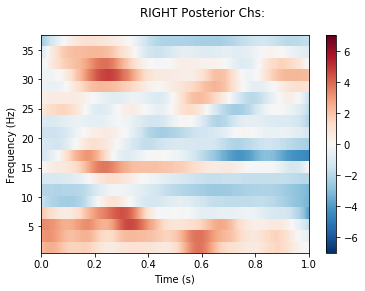

No baseline correction applied


/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


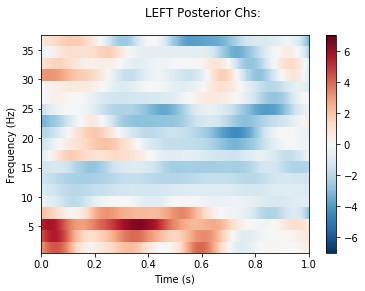

Plotting theta 0-200msec
No baseline correction applied


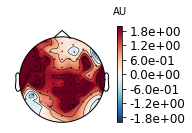

Plotting theta 200-400msec
No baseline correction applied


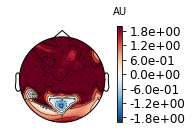

Plotting theta 400-800msec
No baseline correction applied


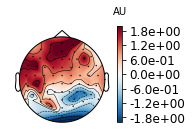

Plotting theta 800-1000msec
No baseline correction applied


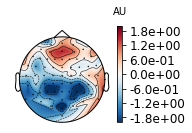

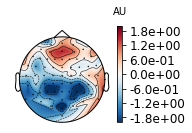

In [57]:
cond='tarLongCue_trig'
## Contrasting with centrally presented:
lat=all_subs_Rights[cond]
center=all_subs_Centers[cond]
latMinusCenter=lat-center
print('\n\nplotting RIGHT hemisphere MINUS CENTER for %s\n' %cond)
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=rightPost_elecs,title='RIGHT Posterior Chs:').show()
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=leftPost_elecs,title='LEFT Posterior Chs:').show()

print('Plotting theta 0-200msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0,tmax=0.2,vmin=-2,vmax=2)
print('Plotting theta 200-400msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
print('Plotting theta 400-800msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
print('Plotting theta 800-1000msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0.8,tmax=1,vmin=-2,vmax=2)

### Target Long SOA, target presented in left visual hemi
##### expect less alpha power (== less inhibition) especially in right channels



plotting LEFT hemisphere MINUS CENTER for tarLongCue_trig

No baseline correction applied


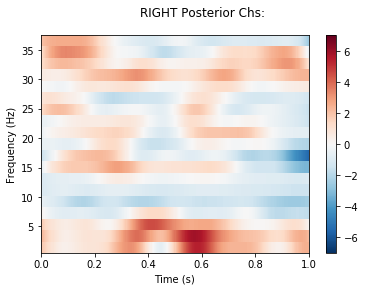

No baseline correction applied


/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


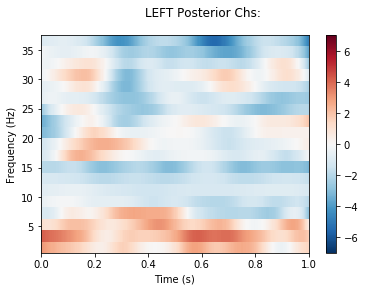

Plotting THETA 0-200msec
No baseline correction applied


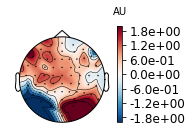

Plotting THETA 200-400msec
No baseline correction applied


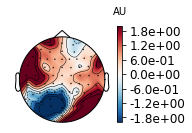

Plotting THETA 400-800msec
No baseline correction applied


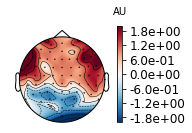

Plotting THETA 800-1000msec
No baseline correction applied


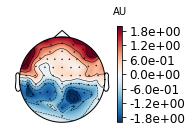

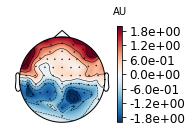

In [56]:
cond='tarLongCue_trig'
## Contrasting with centrally presented:
lat=all_subs_Lefts[cond]
center=all_subs_Centers[cond]
latMinusCenter=lat-center
print('\n\nplotting LEFT hemisphere MINUS CENTER for %s\n' %cond)
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=rightPost_elecs,title='RIGHT Posterior Chs:').show()
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=leftPost_elecs,title='LEFT Posterior Chs:').show()

print('Plotting THETA 0-200msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0,tmax=0.2,vmin=-2,vmax=2)
print('Plotting THETA 200-400msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
print('Plotting THETA 400-800msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
print('Plotting THETA 800-1000msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0.8,tmax=1,vmin=-2,vmax=2)

### Distractor Long SOA cue, when dis is in right hemisphere
###### Expect more alpha power (== more distractor inhibition) in left hemisphere channels



plotting RIGHT hemisphere MINUS CENTER for disLongCue_trig

No baseline correction applied


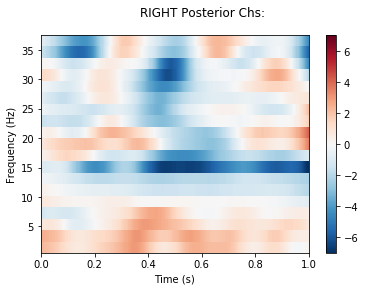

No baseline correction applied


/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


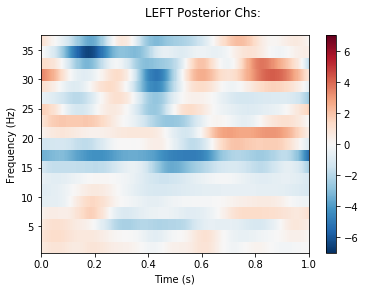

No baseline correction applied


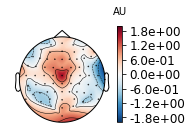

No baseline correction applied


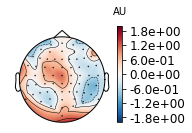

No baseline correction applied


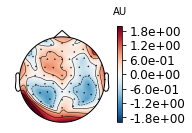

No baseline correction applied


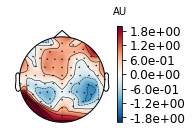

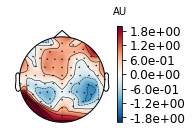

In [51]:
cond='disLongCue_trig'
## Contrasting with centrally presented:
lat=all_subs_Rights[cond]
center=all_subs_Centers[cond]
latMinusCenter=lat-center
print('\n\nplotting RIGHT hemisphere MINUS CENTER for %s\n' %cond)
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=rightPost_elecs,title='RIGHT Posterior Chs:').show()
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=leftPost_elecs,title='LEFT Posterior Chs:').show()

latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-2,vmax=2)

### Distractor cue, Long SOA, with distractor appearing in left hemisphere
##### Expect more alpha power in right posterior channels



plotting LEFT hemisphere MINUS CENTER for disLongCue_trig

No baseline correction applied


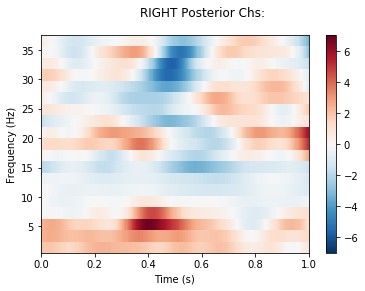

No baseline correction applied


/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


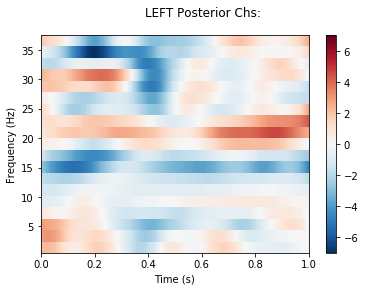

No baseline correction applied


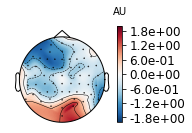

No baseline correction applied


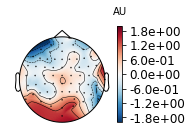

No baseline correction applied


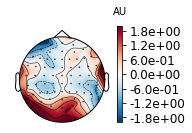

No baseline correction applied


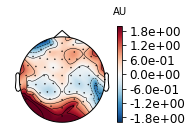

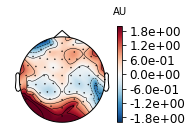

In [52]:
cond='disLongCue_trig'
## Contrasting with centrally presented:
lat=all_subs_Lefts[cond]
center=all_subs_Centers[cond]
latMinusCenter=lat-center
print('\n\nplotting LEFT hemisphere MINUS CENTER for %s\n' %cond)
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=rightPost_elecs,title='RIGHT Posterior Chs:').show()
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=leftPost_elecs,title='LEFT Posterior Chs:').show()

latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-2,vmax=2)

### [Distractor Long SOA] minus [Distractor Short SOA]

In [39]:
leftDisL=all_subs_Lefts['disLongCue_trig']
leftDisS=all_subs_Lefts['disShortCue_trig']



plotting LEFT hemisphere, LONG MINUS SHORT SOA for tarLongCue_trig

No baseline correction applied


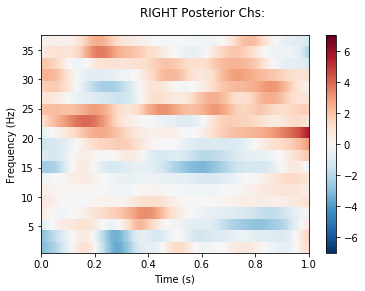

No baseline correction applied


/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


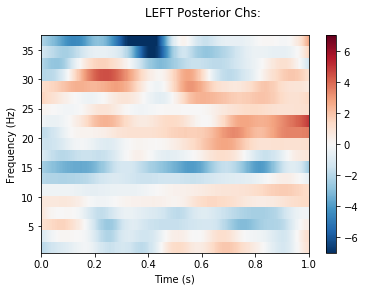

In [40]:
longMinusShort=leftDisL-leftDisS
print('\n\nplotting LEFT hemisphere, LONG MINUS SHORT SOA for distractor cues\n' )
longMinusShort.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=rightPost_elecs,title='RIGHT Posterior Chs:').show()
longMinusShort.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=leftPost_elecs,title='LEFT Posterior Chs:').show()

longMinusShort.plot_topomap(tmin=0,tmax=0.2)

In [41]:
## Combine to just be ipsi and contralateral to cue rather than Left and Right